# Costa Rican Household Poverty Level Prediction
*From Kaggle ([competition link](https://www.kaggle.com/c/costa-rican-household-poverty-prediction))*
  
**By Nema Sobhani & David LaCharite**

## Summary

Income qualification for poor families in Costa Rica to determing need for aid. Data gathered from the *Inter-American Development Bank.*

## Imports

In [98]:
# General tools
import pandas as pd
import numpy as np

# Functions
from functions import *

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
from pprint import pprint

# Classification
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# Classification (Initial)

In [99]:
# Load dataframe 
df = pd.read_pickle('df.pkl')

# Partition explanatory and response variables
X = df.drop(columns=['Target', 'Id', 'idhogar'])
print(X.shape)

y = df['Target']
print(y.shape)

(9557, 135)
(9557,)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [101]:
clf_linear = LinearRegression()

In [102]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.49476987447698745

In [104]:
f1_linear = f1_score(y_test, y_pred, average='macro')
f1_linear

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28386560965239604

## Multiclass Logistic

In [105]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [106]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: C

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [107]:
clf_multiclass_logistic.score(X_test, y_test)

0.5230125523012552

In [108]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic

0.3871799012694391

## SVM

In [109]:
clf_SVM = SVC()

In [110]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [111]:
clf_SVM.score(X_test, y_test)

0.6260460251046025

In [112]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM

0.22173155053186192

## Random Forest

In [113]:
clf_RF = RandomForestClassifier()

In [114]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
clf_RF.score(X_test, y_test)

0.8985355648535565

In [116]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF = f1_score(y_test, y_pred_RF, average='macro')
f1_RF

0.8466637910672062

In [117]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
meaneduc,0.057626
SQBmeaned,0.050892
SQBdependency,0.031181
SQBedjefe,0.027979
hogar_nin,0.027488
SQBovercrowding,0.027318
qmobilephone,0.026119
overcrowding,0.024214
rooms,0.020218
SQBage,0.019893


## XGB Classifier

In [118]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [119]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.251929	validation_1-merror:0.268828
[1]	validation_0-merror:0.238195	validation_1-merror:0.258891
[2]	validation_0-merror:0.233224	validation_1-merror:0.256276
[3]	validation_0-merror:0.228515	validation_1-merror:0.245816
[4]	validation_0-merror:0.228646	validation_1-merror:0.251046
[5]	validation_0-merror:0.223283	validation_1-merror:0.250523
[6]	validation_0-merror:0.218967	validation_1-merror:0.250523
[7]	validation_0-merror:0.219097	validation_1-merror:0.246862
[8]	validation_0-merror:0.213996	validation_1-merror:0.243724
[9]	validation_0-merror:0.212819	validation_1-merror:0.239017
[10]	validation_0-merror:0.212034	validation_1-merror:0.241632
[11]	validation_0-merror:0.210464	validation_1-merror:0.238494
[12]	validation_0-merror:0.206148	validation_1-merror:0.232741
[13]	validation_0-merror:0.205363	validation_1-merror:0.230649
[14]	validation_0-merror:0.203401	validation_1-merror:0.228033
[15]	validation_0-merror:0.201177	validation_1-merror:0.224372
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [120]:
clf_xgb.score(X_test, y_test)

0.8603556485355649

In [121]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb

0.7887912428409045

### Feature Importance (XGBoost)

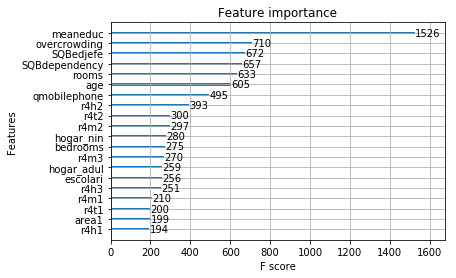

In [122]:
xgb.plot_importance(clf_xgb, max_num_features=20)

# Classification with Predicted Rent Values

In [123]:
# Load dataframe 
df_rent = pd.read_pickle('df_rent.pkl')

# Partition explanatory and response variables
X = df_rent.drop(columns=['Target', 'Id', 'idhogar'])
print(X.shape)

y = df_rent['Target']
print(y.shape)

(9557, 136)
(9557,)


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [125]:
clf_linear = LinearRegression()

In [126]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.4942468619246862

In [128]:
f1_linear_rent = f1_score(y_test, y_pred, average='macro')
f1_linear_rent

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.2840276240621904

## Multiclass Logistic

In [129]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [130]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: C

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [131]:
clf_multiclass_logistic.score(X_test, y_test)

0.5543933054393305

In [132]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic_rent = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic_rent

0.3281125951130635

## SVM

In [133]:
clf_SVM = SVC()

In [134]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [135]:
clf_SVM.score(X_test, y_test)

0.6323221757322176

In [136]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM_rent = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM_rent

0.2099798668643043

## Random Forests

In [137]:
clf_RF = RandomForestClassifier()

In [138]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
clf_RF.score(X_test, y_test)

0.8948744769874477

In [140]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF_rent = f1_score(y_test, y_pred_RF, average='macro')
f1_RF_rent

0.8377215850590503

In [141]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
v2a1,0.067891
SQBmeaned,0.047744
meaneduc,0.040809
SQBdependency,0.027724
overcrowding,0.027037
qmobilephone,0.025180
hogar_nin,0.024728
SQBedjefe,0.023298
SQBovercrowding,0.023207
agesq,0.019984


## XGB Classifier

In [142]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [143]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.257554	validation_1-merror:0.287134
[1]	validation_0-merror:0.238587	validation_1-merror:0.263075
[2]	validation_0-merror:0.230608	validation_1-merror:0.256799
[3]	validation_0-merror:0.222891	validation_1-merror:0.257322
[4]	validation_0-merror:0.223152	validation_1-merror:0.251569
[5]	validation_0-merror:0.220275	validation_1-merror:0.249477
[6]	validation_0-merror:0.215304	validation_1-merror:0.25
[7]	validation_0-merror:0.210988	validation_1-merror:0.25
[8]	validation_0-merror:0.209941	validation_1-merror:0.243724
[9]	validation_0-merror:0.206409	validation_1-merror:0.240063
[10]	validation_0-merror:0.205625	validation_1-merror:0.237448
[11]	validation_0-merror:0.202224	validation_1-merror:0.240063
[12]	validation_0-merror:0.201439	validation_1-merror:0.235879
[13]	validation_0-merror:0.201308	validation_1-merror:0.234833
[14]	validation_0-merror:0.199084	validation_1-merror:0.229079
[15]	validation_0-merror:0.195291	validation_1-merror:0.226464
[16]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [144]:
clf_xgb.score(X_test, y_test)

0.8640167364016736

In [145]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb_rent = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb_rent

0.7926839596156446

### Feature Importance (XGBoost)

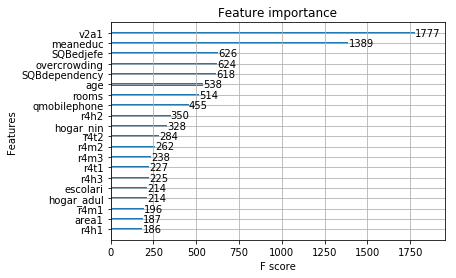

In [146]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Comparison of Models (No Rent vs Rent)

In [147]:
print("Change in f1 with predicted rent values:\n")

# Linear Regression
print("Linear Regression:\t ", round(f1_linear_rent - f1_linear, 5))

# Multiple Logistic Regression
print("Logistic Regression:\t", round(f1_logistic_rent - f1_logistic, 5))

# SVM
print("Support Vector Machines:", round(f1_SVM_rent - f1_SVM, 5))

# Random Forrest
print("Random Forrest:\t\t ", round(f1_RF_rent - f1_RF, 5))

# XGB
print("XGBoost:\t\t", round(f1_xgb_rent - f1_xgb, 5))

Change in f1 with predicted rent values:

Linear Regression:	  0.00016
Logistic Regression:	 -0.05907
Support Vector Machines: -0.01175
Random Forrest:		  -0.00894
XGBoost:		 0.00389


### Random Forest vs XGBoost

In [148]:
print("NO RENT (RF)", f1_RF)
print("W/ RENT (RF)", f1_RF_rent)
print("NO RENT (XGB)", f1_xgb)
print("W/ RENT (XGB)", f1_xgb_rent)

NO RENT (RF) 0.8466637910672062
W/ RENT (RF) 0.8377215850590503
NO RENT (XGB) 0.7887912428409045
W/ RENT (XGB) 0.7926839596156446


# Classification with Predicted Rent Values AND Tranformations

In [149]:
# Load dataframe 
df_trans = pd.read_pickle('df_trans.pkl')

# Partition explanatory and response variables
X = df_trans.drop(columns=['Target', 'Id', 'idhogar'])
print(X.shape)

y = df_trans['Target']
print(y.shape)

(9557, 141)
(9557,)


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [151]:
clf_linear = LinearRegression()

In [152]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.5015690376569037

In [154]:
f1_linear_trans = f1_score(y_test, y_pred, average='macro')
f1_linear_trans

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28595366009121614

## Multiclass Logistic

In [155]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [156]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [157]:
clf_multiclass_logistic.score(X_test, y_test)

0.6265690376569037

In [158]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic_trans = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic_trans

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.19260450160771705

## SVM

In [159]:
clf_SVM = SVC()

In [160]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [161]:
clf_SVM.score(X_test, y_test)

0.6317991631799164

In [162]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM_trans = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM_trans

0.207876825155869

## Random Forests

In [163]:
clf_RF = RandomForestClassifier()

In [164]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
clf_RF.score(X_test, y_test)

0.9231171548117155

In [166]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF_trans = f1_score(y_test, y_pred_RF, average='macro')
f1_RF_trans

0.8852911833817918

In [167]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
SQ_v2a1,0.052571
meaneduc,0.043464
v2a1,0.038639
SQBmeaned,0.038421
SQBdependency,0.034722
LOG_meaneduc,0.030537
LOG_SQBdependency,0.025043
SQBovercrowding,0.022806
SQBedjefe,0.020889
hogar_nin,0.020283


## XGB Classifier

In [168]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [169]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.257816	validation_1-merror:0.287657
[1]	validation_0-merror:0.238849	validation_1-merror:0.263075
[2]	validation_0-merror:0.23087	validation_1-merror:0.256799
[3]	validation_0-merror:0.22433	validation_1-merror:0.259414
[4]	validation_0-merror:0.222368	validation_1-merror:0.251046
[5]	validation_0-merror:0.21949	validation_1-merror:0.247908
[6]	validation_0-merror:0.215173	validation_1-merror:0.247908
[7]	validation_0-merror:0.212034	validation_1-merror:0.251046
[8]	validation_0-merror:0.20981	validation_1-merror:0.243201
[9]	validation_0-merror:0.206017	validation_1-merror:0.240063
[10]	validation_0-merror:0.203793	validation_1-merror:0.233787
[11]	validation_0-merror:0.202485	validation_1-merror:0.237971
[12]	validation_0-merror:0.200262	validation_1-merror:0.233787
[13]	validation_0-merror:0.199477	validation_1-merror:0.232741
[14]	validation_0-merror:0.197907	validation_1-merror:0.231172
[15]	validation_0-merror:0.195029	validation_1-merror:0.229079
[16]	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [170]:
clf_xgb.score(X_test, y_test)

0.8640167364016736

In [171]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb_trans = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb_trans

0.7937603953947778

### Feature Importance (XGBoost)

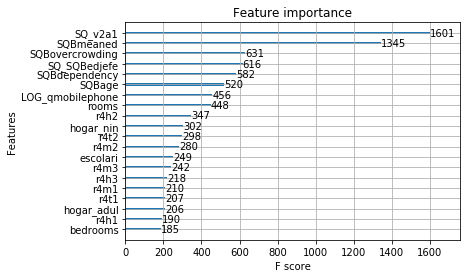

In [172]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Comparison of Models (Rent vs Rent with Transposed)

In [173]:
print("Change in f1 with predicted rent values and transposed features:\n")

# Linear Regression
print("Linear Regression:\t ", round(f1_linear_trans - f1_linear_rent, 5))

# Multiple Logistic Regression
print("Logistic Regression:\t", round(f1_logistic_trans - f1_logistic_rent, 5))

# SVM
print("Support Vector Machines:", round(f1_SVM_trans - f1_SVM_rent, 5))

# Random Forrest
print("Random Forrest:\t\t ", round(f1_RF_trans - f1_RF_rent, 5))

# XGB
print("XGBoost:\t\t", round(f1_xgb_trans - f1_xgb_rent, 5))

Change in f1 with predicted rent values and transposed features:

Linear Regression:	  0.00193
Logistic Regression:	 -0.13551
Support Vector Machines: -0.0021
Random Forrest:		  0.04757
XGBoost:		 0.00108


### Random Forest vs XGBoost

In [174]:
print("RENT (RF)\t", f1_RF_rent)
print("RENT / TRANSFORMED (RF)", f1_RF_trans)
print("RENT (XGB)\t", f1_xgb_rent)
print("RENT / TRANSFORMED (XGB)", f1_xgb_trans)

RENT (RF)	 0.8377215850590503
RENT / TRANSFORMED (RF) 0.8852911833817918
RENT (XGB)	 0.7926839596156446
RENT / TRANSFORMED (XGB) 0.7937603953947778
